In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import cv2

In [2]:
img = cv2.imread('./test_images/beckham3.jpg')
img.shape

(1382, 750, 3)

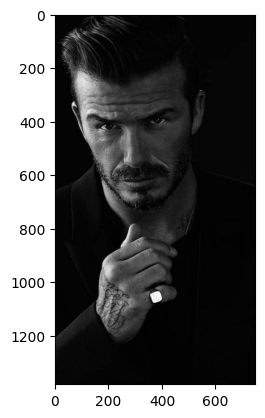

In [3]:
plt.imshow(img)

In [4]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_frontalface_default.xml')

# scaleFactor, minNeighbors usually 5 but for some reason like beckham3 can not detect, I dont want to get rid of image like that so reduce to 3
faces = face_cascade.detectMultiScale(img, 1.3, 3)
faces

array([[ 68, 264, 430, 430]])

In [5]:
(x,y,w,h) = faces[0]
x,y,w,h

(68, 264, 430, 430)

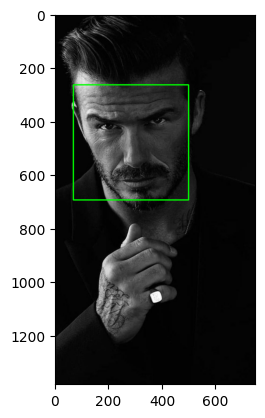

In [6]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
plt.imshow(face_img)

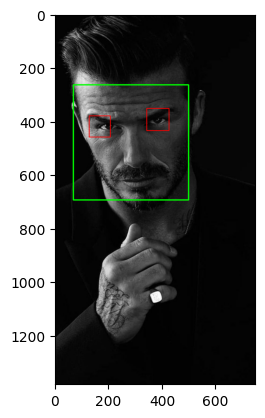

In [7]:
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_eye.xml')
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
    crop = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(crop)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(crop,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
        

plt.figure()
plt.imshow(face_img)
plt.show()

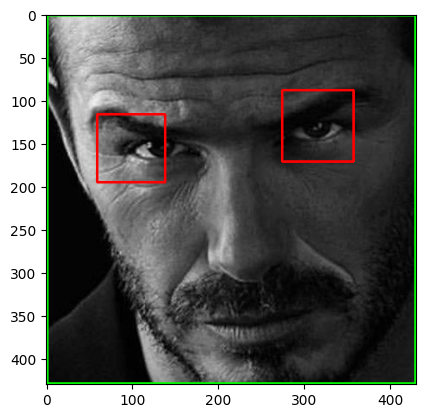

In [8]:
plt.imshow(crop)

In [9]:
def get_cropped_image_if_valid(image_path):
    img = cv2.imread(image_path)
    faces = face_cascade.detectMultiScale(img, 1.3, 3)
    for (x,y,w,h) in faces:
        crop = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(crop)
        if len(eyes) >= 2:
            return crop

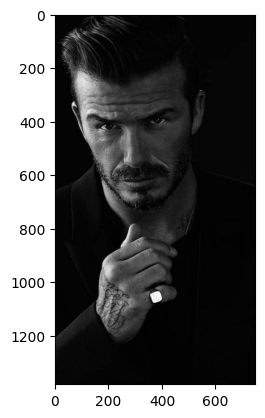

In [10]:
original_image = cv2.imread('./test_images/beckham3.jpg')
plt.imshow(original_image)

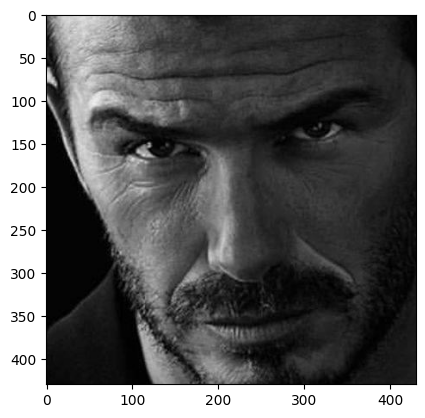

In [11]:
cropped_image = get_cropped_image_if_valid('./test_images/beckham3.jpg')
plt.imshow(cropped_image)

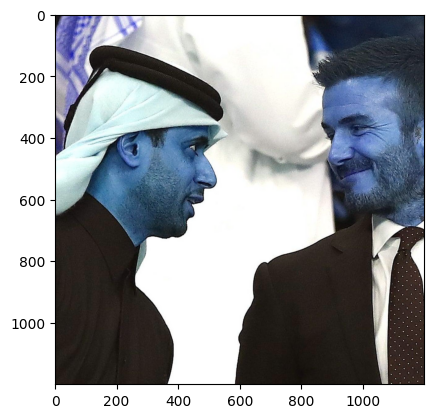

In [12]:
fail_image = cv2.imread('./test_images/beckham2.jpg')
plt.imshow(fail_image)

In [20]:
cropped_image_no_valid = get_cropped_image_if_valid('./test_images/beckham2.jpg')
cropped_image_no_valid

In [21]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        
img_dirs

['./dataset/alisson becker',
 './dataset/cristiano ronaldo',
 './dataset/cropped',
 './dataset/david beckham',
 './dataset/erling haaland',
 './dataset/kevin de bruyne',
 './dataset/kylian mbappe',
 './dataset/lionel messi',
 "./dataset/n'golo kante",
 './dataset/neymar face',
 './dataset/virgil van dijk']

In [22]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [23]:
cropped_image_dirs = []
# take dict for after purpose 
footballers_names_dict = {}

for img_dir in img_dirs:
    count = 1
    footballers_name = img_dir.split('/')[-1]
    print(footballers_name)
    
    footballers_names_dict[footballers_name] = []
    
    for entry in os.scandir(img_dir):
        crop = get_cropped_image_if_valid(entry.path)
        if crop is not None:
            cropped_folder = path_to_cr_data + footballers_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = footballers_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, crop)
            footballers_names_dict[footballers_name].append(cropped_file_path)
            count += 1    

alisson becker
Generating cropped images in folder:  ./dataset/cropped/alisson becker
cristiano ronaldo
Generating cropped images in folder:  ./dataset/cropped/cristiano ronaldo
cropped
david beckham
Generating cropped images in folder:  ./dataset/cropped/david beckham
erling haaland
Generating cropped images in folder:  ./dataset/cropped/erling haaland
kevin de bruyne
Generating cropped images in folder:  ./dataset/cropped/kevin de bruyne
kylian mbappe
Generating cropped images in folder:  ./dataset/cropped/kylian mbappe
lionel messi
Generating cropped images in folder:  ./dataset/cropped/lionel messi
n'golo kante
Generating cropped images in folder:  ./dataset/cropped/n'golo kante
neymar face
Generating cropped images in folder:  ./dataset/cropped/neymar face
virgil van dijk
Generating cropped images in folder:  ./dataset/cropped/virgil van dijk


In [24]:
footballers_names_dict

{'alisson becker': ['./dataset/cropped/alisson becker/alisson becker1.png',
  './dataset/cropped/alisson becker/alisson becker2.png',
  './dataset/cropped/alisson becker/alisson becker3.png',
  './dataset/cropped/alisson becker/alisson becker4.png',
  './dataset/cropped/alisson becker/alisson becker5.png',
  './dataset/cropped/alisson becker/alisson becker6.png',
  './dataset/cropped/alisson becker/alisson becker7.png',
  './dataset/cropped/alisson becker/alisson becker8.png',
  './dataset/cropped/alisson becker/alisson becker9.png',
  './dataset/cropped/alisson becker/alisson becker10.png',
  './dataset/cropped/alisson becker/alisson becker11.png',
  './dataset/cropped/alisson becker/alisson becker12.png',
  './dataset/cropped/alisson becker/alisson becker13.png',
  './dataset/cropped/alisson becker/alisson becker14.png',
  './dataset/cropped/alisson becker/alisson becker15.png',
  './dataset/cropped/alisson becker/alisson becker16.png',
  './dataset/cropped/alisson becker/alisson bec

In [25]:
cropped_image_dirs

['./dataset/cropped/alisson becker',
 './dataset/cropped/cristiano ronaldo',
 './dataset/cropped/david beckham',
 './dataset/cropped/erling haaland',
 './dataset/cropped/kevin de bruyne',
 './dataset/cropped/kylian mbappe',
 './dataset/cropped/lionel messi',
 "./dataset/cropped/n'golo kante",
 './dataset/cropped/neymar face',
 './dataset/cropped/virgil van dijk']

we take some more crop picture of kante by hand because we have quite low pic compare to other footballers in `kante take more` folder

Also this is the step after delete by hand some error pic

In [29]:
img_dir = "./dataset/kante take more"
count = 24
footballers_name = "n'golo kante"
print(footballers_name)
    
for entry in os.scandir(img_dir):
    crop = get_cropped_image_if_valid(entry.path)
    if crop is not None:
        cropped_folder = path_to_cr_data + footballers_name
        print("Generating cropped images in folder: ",cropped_folder)
                
        cropped_file_name = footballers_name + str(count) + ".png"
        cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
        cv2.imwrite(cropped_file_path, crop)
        footballers_names_dict[footballers_name].append(cropped_file_path)
        count += 1    

n'golo kante
Generating cropped images in folder:  ./dataset/cropped/n'golo kante


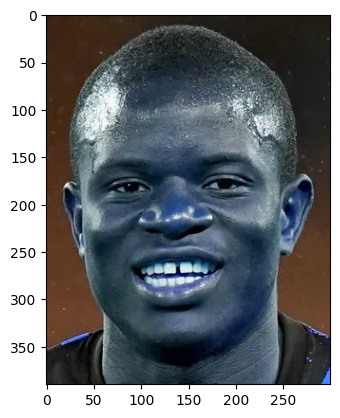

In [64]:
kante_image = cv2.imread('./dataset/kante take more/225083-1598302373.jpg')
plt.imshow(kante_image)

In [65]:
faces = face_cascade.detectMultiScale(kante_image, 1.3, 3)
faces

()

still can not detect althought I try some best image, maybe because of dark black skin of he not work well with algorithm of haarcascade 

quite racist right ?